In [6]:
#Necessary Libs required
#Please install all the below necessary libs
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


# Copying the files from the data-set - Only [COVID and Normal] classes

Pre-requisite: Please copy the downloaded .zip file from  which is around 783 MB into a specific folder and update data_dir variable accordingly. This is a mandatory requirement.
1. Download the data-set .zip from https://www.kaggle.com/datasets/preetviradiya/covid19-radiography-dataset
2. Copy into the same location where you are running this jupyter script.
3. Update data_dir = 'location/to/your/file/directory
4. I have copied Summative-Assessment-2.ipynb file into a directory. In the same directory, I have copied "COVID-19_Radiography_Dataset" directory into it.

I have copied the files into the below location for your example reference.
For ex: data_dir = 'COVID-19_Radiography_Dataset'

Next important steps to create a data_set:
Create 3 directories in the location you want to have your training/test/validation files to be copied.
For ex:
1. 'location/to/data-set/train'
2. 'location/t0/data-set/validation'
3. 'location/to/data-set/test'

For example:
train_dir = 'COVID-19_Radiography_Dataset/train_data/train'  
valid_dir = 'COVID-19_Radiography_Dataset/train_data/validation'  
test_dir =  'COVID-19_Radiography_Dataset/train_data/test'
This copies all the files from the zip by splitting 80/10/10 in their respective folder train/validation/test.

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split
import random 

# Define the path to your dataset directory
data_dir = 'COVID-19_Radiography_Dataset'

# Define the list of class directories
class_dirs = ['COVID', 'Normal']

# Define the maximum number of files to copy from each class
max_files_per_class = 6000

# Create empty lists to store the file paths and names for each class
class_files = [[] for _ in range(len(class_dirs))]
class_file_names = [[] for _ in range(len(class_dirs))]

# Iterate over the class directories and collect the file paths and names
for i, class_dir in enumerate(class_dirs):
    class_path = os.path.join(data_dir, class_dir)
    class_files[i] = [os.path.join(class_path, filename) for filename in os.listdir(class_path)]
    class_file_names[i] = [filename for filename in os.listdir(class_path)]

# Create directories for train, validation, and test sets
train_dir = 'COVID-19_Radiography_Dataset/train_data/train'  # Replace with the desired path
valid_dir = 'COVID-19_Radiography_Dataset/train_data/validation'  # Replace with the desired path
test_dir =  'COVID-19_Radiography_Dataset/train_data/test'  # Replace with the desired path

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy the files to the respective directories with a maximum limit
for i, class_files in enumerate(class_files):
    selected_files = class_files[:]
    if len(selected_files) > max_files_per_class:
        selected_files = random.sample(selected_files, max_files_per_class)

    train_files, test_valid_files = train_test_split(selected_files, test_size=0.2, random_state=42)
    valid_files, test_files = train_test_split(test_valid_files, test_size=0.5, random_state=42)

    for file in train_files:
        file_name = os.path.basename(file)
        class_name = class_dirs[i]
        destination = os.path.join(train_dir, class_name, file_name)
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        shutil.copy(file, destination)

    for file in valid_files:
        file_name = os.path.basename(file)
        class_name = class_dirs[i]
        destination = os.path.join(valid_dir, class_name, file_name)
        os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)
        shutil.copy(file, destination)

    for file in test_files:
        file_name = os.path.basename(file)
        class_name = class_dirs[i]
        destination = os.path.join(test_dir, class_name, file_name)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        shutil.copy(file, destination)

print("Finished copying files.")


Finished copying files.


# Generating Train/Validation/Test data-sets

In [8]:
path = 'COVID-19_Radiography_Dataset/train_data/train'
# For local system
#path = '/content/chest_xray/chest_xray/train'
classes = os.listdir(path)
print(classes)

['COVID', 'Normal']


In [9]:
# Define the directories for the X-ray images
COVID_dir = os.path.join(path + '/' + classes[0])
NORMAL_dir = os.path.join(path + '/' + classes[1])
 
# Create lists of the file names in each directory
covid_names = os.listdir(COVID_dir)
normal_names = os.listdir(NORMAL_dir)
#These files are from Train folder only.Does not include files from Test and validate folders. 
print('There are ', len(covid_names),
      'images of covid infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')

There are  4608 images of covid infected in training dataset
There are  4577 normal images in training dataset


In [10]:
#Below number of files are used to train/test/validate
#Found 11182 files belonging to 2 classes. (Train)
#Found 1382 files belonging to 2 classes. (Test)
#Found 1244 files belonging to 2 classes. (Validate)

Train = tf.keras.utils.image_dataset_from_directory(
    directory='COVID-19_Radiography_Dataset/train_data/train',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))
Test = tf.keras.utils.image_dataset_from_directory(
    directory='COVID-19_Radiography_Dataset/train_data/test',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))
Validation = tf.keras.utils.image_dataset_from_directory(
    directory='COVID-19_Radiography_Dataset/train_data/validation',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))

Found 9185 files belonging to 2 classes.
Found 1716 files belonging to 2 classes.
Found 1711 files belonging to 2 classes.


# Model

In [11]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(2, activation='sigmoid')
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

# Compiling and Training

In [13]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)


In [14]:
checkpoint_callback = ModelCheckpoint('model_{epoch:02d}.h5', save_weights_only=False, save_freq='epoch')
history = model.fit(Train, epochs=8, validation_data=Validation, callbacks=[tf.keras.callbacks.EarlyStopping(verbose=1, patience=4),checkpoint_callback])

Epoch 1/8


288/288 [==============================] - 321s 1s/step - loss: 0.4538 - accuracy: 0.8057 - val_loss: 3.4082 - val_accuracy: 0.4997
Epoch 2/8
288/288 [==============================] - 314s 1s/step - loss: 0.3143 - accuracy: 0.8733 - val_loss: 1.1098 - val_accuracy: 0.6365
Epoch 3/8
288/288 [==============================] - 305s 1s/step - loss: 0.2579 - accuracy: 0.9002 - val_loss: 0.3294 - val_accuracy: 0.8615
Epoch 4/8
288/288 [==============================] - 293s 1s/step - loss: 0.2118 - accuracy: 0.9174 - val_loss: 0.3251 - val_accuracy: 0.8784
Epoch 5/8
288/288 [==============================] - 291s 1s/step - loss: 0.1940 - accuracy: 0.9265 - val_loss: 4.5735 - val_accuracy: 0.5137
Epoch 6/8
288/288 [==============================] - 288s 1s/step - loss: 0.1757 - accuracy: 0.9334 - val_loss: 2.1191 - val_accuracy: 0.8387
Epoch 7/8
288/288 [==============================] - 288s 1s/step - loss: 0.1539 - accuracy: 0.9431 - val_loss: 1.1873 - val_accuracy: 0.8562
Epoc

# Results Section

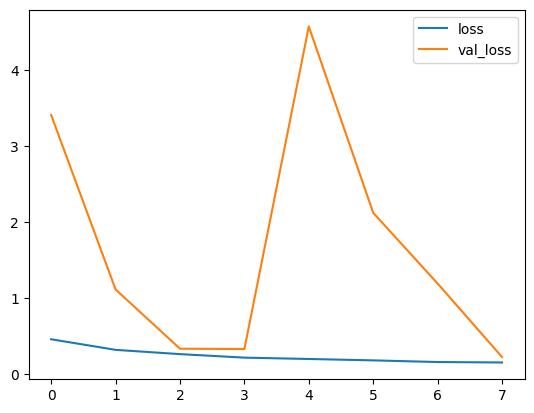

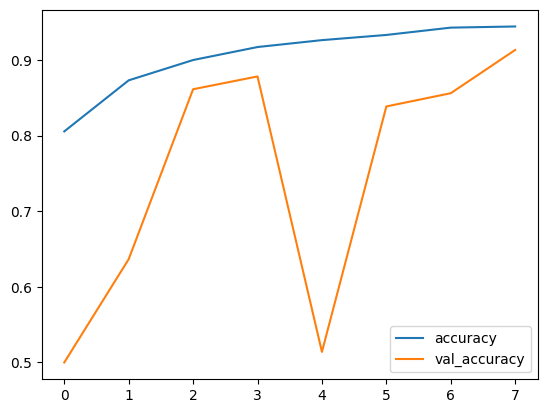

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [16]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
	np.round(accuracy*100))


54/54 [==============================] - 16s 270ms/step - loss: 0.2134 - accuracy: 0.9143
The accuracy of the model on test dataset is 91.0


In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


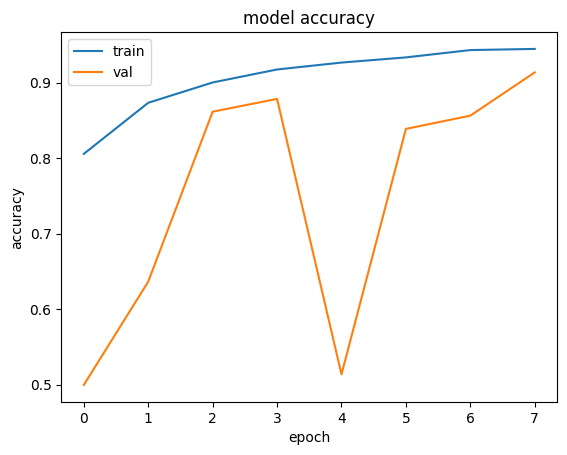

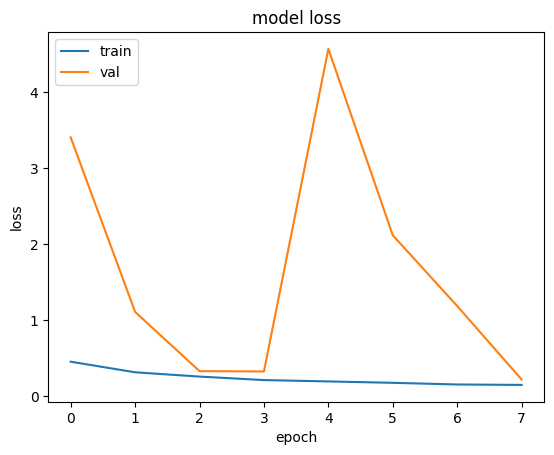

Training Accuracy: [0.8056613802909851, 0.873271644115448, 0.9001632928848267, 0.9173652529716492, 0.9265106320381165, 0.9333696365356445, 0.9430593252182007, 0.944583535194397]
Validation Accuracy: [0.49970775842666626, 0.6364699006080627, 0.8614845275878906, 0.8784336447715759, 0.5137346386909485, 0.8386908173561096, 0.8562244176864624, 0.9135009050369263]
Training Loss: [0.4538383185863495, 0.3143097758293152, 0.2578912377357483, 0.21179354190826416, 0.19402475655078888, 0.17573557794094086, 0.15390001237392426, 0.14798153936862946]
Validation Loss: [3.408205986022949, 1.109771966934204, 0.32937273383140564, 0.32512637972831726, 4.573497295379639, 2.1191041469573975, 1.187346339225769, 0.21972738206386566]


In [18]:
#validation set :Its purpose is to track progress through validation loss and accuracy.
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Print accuracy values
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])

# Print loss values
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])

In [19]:
import numpy as np

test_images = []
test_labels = []

for images, labels in Test:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

test_acc = np.sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')


54/54 [==============================] - 21s 264ms/step
Test set accuracy: 91%


54/54 [==============================] - 15s 269ms/step
Confusion Matrix:
[[464 399]
 [422 431]]


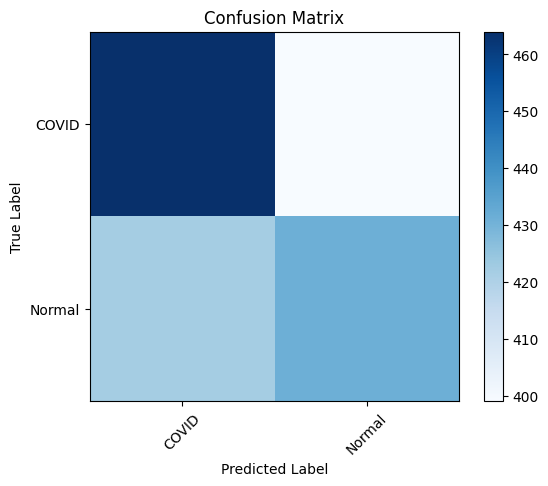

In [20]:
class_names = ['COVID', 'Normal']
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted labels for the test set
y_pred = np.argmax(model.predict(Test), axis=1)

# Get the true labels for the test set
y_true = np.argmax(test_labels, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the class names
class_names = ['COVID', 'Normal']

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.show()


In [21]:
# Calculate precision from the confusion matrix
precision = np.diag(cm) / np.sum(cm, axis=0)

# Print precision for each class
for i, class_name in enumerate(class_names):
    print(f"Precision ({class_name}): {precision[i]}")


Precision (COVID): 0.5237020316027088
Precision (Normal): 0.519277108433735


Calculating Mean Squared Error (MSE) and Recall

In [22]:
from sklearn.metrics import mean_squared_error, recall_score

# Create empty lists for storing true labels and predicted labels
y_true = []
y_pred = []

# Iterate over the Test dataset and extract true labels and predicted labels
for images, labels in Test:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_labels)
    y_true.extend(np.argmax(labels, axis=1))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Recall
recall = recall_score(y_true, y_pred, average='binary')

# Print the results
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Recall: {:.4f}".format(recall))


1/1 [==============================] - 0s 196ms/step
Mean Squared Error (MSE): 0.0857
Recall: 0.9004


1/1 [==============================] - 0s 141ms/step
Normal


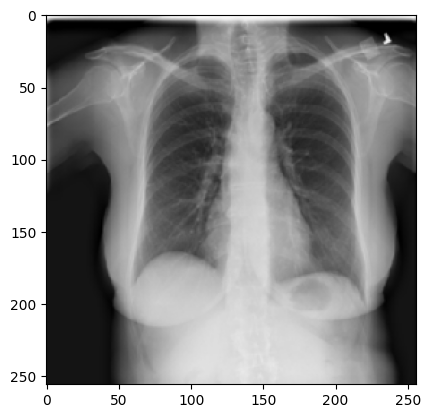

In [38]:
# Load the image from the directory
# "COVID-98.png" Copy any file into the local directory.
# with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"Normal-5239.png",
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array and
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] < class_probabilities[1]:
	print("Normal")
else:
	print("COVID")


# Distribution of DATA-SET Section and Bias

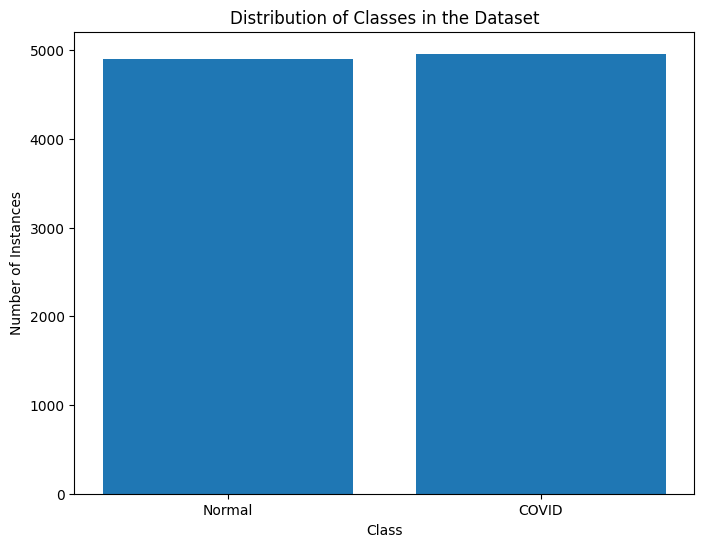

        Count  Percentage
Normal   4905   49.716197
COVID    4961   50.283803


In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the dataset directory
# Please update the path accordingly
dataset_dir = "COVID-19_Radiography_Dataset"

# Get the list of class directories
class_directories = ["Normal", "COVID"]

# Create an empty dictionary to store the class distributions
class_distributions = {}

# Iterate over the class directories
for class_name in class_directories:
    class_path = os.path.join(dataset_dir, class_name)
    file_count = len(os.listdir(class_path))
    class_distributions[class_name] = file_count

# Convert the class distributions to a DataFrame for easier manipulation
df_class_distributions = pd.DataFrame.from_dict(class_distributions, orient='index', columns=['Count'])

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(df_class_distributions.index, df_class_distributions['Count'])
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Distribution of Classes in the Dataset')
plt.show()

# Calculate the percentage distribution of classes
total_instances = df_class_distributions['Count'].sum()
df_class_distributions['Percentage'] = df_class_distributions['Count'] / total_instances * 100

# Print the class distributions
print(df_class_distributions)


Calculating the Bias

In [37]:
# Calculate the bias in the dataset
max_count = df_class_distributions['Count'].max()
min_count = df_class_distributions['Count'].min()
bias_percentage = (max_count - min_count) / max_count * 100

# Print the bias percentage
print("Bias Percentage: {:.2f}%".format(bias_percentage))


Bias Percentage: 1.13%
